In [2]:
pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=66578f334856ff21cb1a3a0c651c3d8ecdbe860bc739423232b2514529252bcf
  Stored in directory: c:\users\deepanshu\appdata\local\pip\cache\wheels\d1\5f\e6\771479559f992b8398265ebf61f8a3d33ca0b8f75552e06ad2
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [ ]:
df = pd.read_excel("C:/Users/Deepanshu/DA/Python/Superstore Analysis/Superstore dataset.xls")

=====================================================
=====================================================

# Data Preprocessing

=====================================================
=====================================================

In [223]:
LocationLookup = df[['Country', 'Region', 'State', 'City', 'Postal Code'
]].sort_values(
    by=['Region', 'State', 'City', 'Postal Code'], 
    ascending=True
).drop_duplicates()

#### Creating a table 'LocationLookup' to normalize the original dataframe
==================================================================================================================

creating an index column for LocationLookup table

In [224]:
# no of digits in the number obtained after finding the number of records
zfill_len = len(str(len(LocationLookup)))

In [225]:
LocationLookup['Location Id'] = ["USA" + str(i).zfill(zfill_len) for i in range(1, len(LocationLookup) + 1)]

In [226]:
# rearranging the columns
LocationLookup = LocationLookup[['Location Id', 'Country', 'Region', 'State', 'City', 'Postal Code']]

In [227]:
LocationLookup.reset_index(drop=True, inplace=True)

In [228]:
# replalcing columns 'Country', 'City', 'Region', 'Postal Code' with 'Location Id'
df = pd.merge(
    df, 
    LocationLookup, 
    on=['Country', 'Region', 'State', 'City', 'Postal Code'], 
    how='left'
)

In [229]:
# dropping unwanted columns to reduce redundancy
df = df.drop(['Country', 'Region', 'State', 'City', 'Postal Code'], axis=1)

In [230]:
# rearranging the columns in the dataframe
df = df[[
    'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Location Id', 'Segment', 
    'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'
]]

#### Creating a table 'OrderLookup' to normalize the original dataframe
==================================================================================================================

In [231]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Location Id', 'Segment', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [232]:
OrderLookup = df[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode']].sort_values(by=['Order ID'])

In [233]:
OrderLookup = OrderLookup.drop_duplicates(['Order ID'])

In [234]:
OrderLookup.reset_index(drop=True, inplace=True)

In [235]:
# dropping unnecessary columns from original fact table 
df = df.drop(['Order Date', 'Ship Date', 'Ship Mode'], axis=1)

In [236]:
OrderLookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order ID    5009 non-null   object        
 1   Order Date  5009 non-null   datetime64[ns]
 2   Ship Date   5009 non-null   datetime64[ns]
 3   Ship Mode   5009 non-null   object        
dtypes: datetime64[ns](2), object(2)
memory usage: 156.7+ KB


In [237]:
OrderLookup['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

#### Creating a table 'CustomerLookup' to normalize the original dataframe
==================================================================================================================

In [238]:
df.columns

Index(['Order ID', 'Customer ID', 'Customer Name', 'Location Id', 'Segment',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [239]:
CustomerLookup = df[['Customer ID', 'Customer Name']].sort_values(by=['Customer ID']).drop_duplicates(['Customer ID'])

In [240]:
CustomerLookup.reset_index(drop=True, inplace=True)

In [241]:
# dropping unnecessary ccolumns from original fact table
df = df.drop(['Customer Name'], axis=1)

#### Creating a table 'ProductLookup' to normalize the original dataframe
==================================================================================================================

In [242]:
df.columns

Index(['Order ID', 'Customer ID', 'Location Id', 'Segment', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [243]:
ProductLookup = df[['Product ID', 'Product Name', 'Category', 'Sub-Category']].sort_values(
    by=['Product ID']
).drop_duplicates()

In [244]:
# resetting index values
ProductLookup.reset_index(drop=True, inplace=True)

In [245]:
# dropping unnecessary columns from the original fact table
df.drop(
    columns=['Category', 'Sub-Category', 'Product Name'], 
    axis=1, 
    inplace=True
)

In [246]:
conditions = [
    df['Profit'] > 0, 
    df['Profit']  == 0, 
    df['Profit'] < 0
]

choices = [
    'Profit', 
    'None', 
    'Loss'
]

df['Profit Or Loss'] = np.select(conditions, choices)

In [247]:
TransactionTable = df

In [248]:
TransactionTable.drop_duplicates(inplace=True)

In [249]:
TransactionTable['Sales'] = round(TransactionTable['Sales'], 2)
TransactionTable['Profit'] = round(TransactionTable['Profit'], 2)

In [250]:
TransactionTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        9993 non-null   object 
 1   Customer ID     9993 non-null   object 
 2   Location Id     9993 non-null   object 
 3   Segment         9993 non-null   object 
 4   Product ID      9993 non-null   object 
 5   Sales           9993 non-null   float64
 6   Quantity        9993 non-null   int64  
 7   Discount        9993 non-null   float64
 8   Profit          9993 non-null   float64
 9   Profit Or Loss  9993 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 858.8+ KB


=====================================================
=====================================================

# Key Performance Indicators

=====================================================
=====================================================

##### Total Sales
==================================================================================================================

In [251]:
result = TransactionTable[['Sales']].sum().values[0]
print("Total Sales: ${}" .format(round(result, 2)))

Total Sales: $2296919.37


##### Total Profit
==================================================================================================================

In [252]:
result = TransactionTable[
    TransactionTable['Profit Or Loss'] == "Profit"
][['Profit']].sum().values[0]

print("Total Profit: ${}" .format(round(result, 2)))

Total Profit: $442527.59


##### Profit or Loss distribution
==================================================================================================================

Profit and Loss distribution by number of transactions

In [253]:
total_transactions = len(TransactionTable)
profit_transactions = len(TransactionTable[TransactionTable['Profit Or Loss'] == "Profit"])
loss_transactions = len(TransactionTable[TransactionTable['Profit Or Loss'] == "Loss"])
none_transactions = len(TransactionTable[TransactionTable['Profit Or Loss'] == "None"])

profit_percent = profit_transactions/total_transactions*100
loss_percent = loss_transactions/total_transactions*100
none_percent = none_transactions/total_transactions*100

In [254]:
import pandas as pd

distribution = pd.DataFrame({
    'Transaction Type': ['Profit', 'Loss', 'None'],
    'Count': [profit_percent, loss_percent, none_percent]
})

print(distribution)


  Transaction Type      Count
0           Profit  80.636446
1             Loss  18.713099
2             None   0.650455


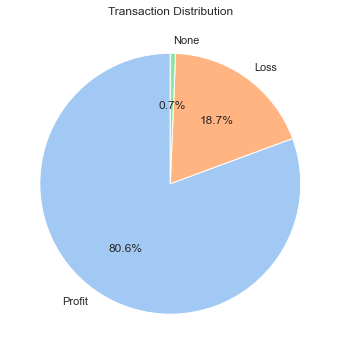

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie Chart
plt.figure(figsize=(8, 6)) # 1. Set the figure size
plt.pie(
    distribution['Count'], # 2. Values that determine the size of each slice
    labels=distribution['Transaction Type'], # 3. Labels for each slice
    autopct='%1.1f%%', # 4. Format to display % values on slices
    startangle=90, # 5. Rotate the start of the first slice
    colors=sns.color_palette('pastel')) # 6. Use pastel colors from Seaborn
plt.title('Transaction Distribution')
plt.show()


##### Order distribution by Product Category
==================================================================================================================

In [257]:
df = pd.merge(
    TransactionTable, 
    ProductLookup, 
    on='Product ID', 
    how="left"
)

In [258]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [259]:
# creating set of Order IDs per Category
furniture_orders = set(
    df[df['Category'] == "Furniture"]['Order ID']
)

office_orders = set(
    df[df['Category'] == "Office Supplies"]['Order ID']
)

technology_orders = set(
    df[df['Category'] == "Technology"]['Order ID']
)

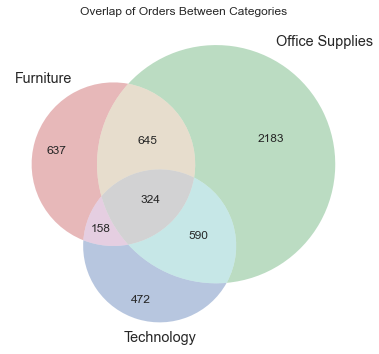

In [260]:
# plotting the venn diagram
plt.figure(figsize=(8, 6))
venn3(
    [furniture_orders, office_orders, technology_orders], 
    set_labels=('Furniture', 'Office Supplies', 'Technology')
)
plt.title("Overlap of Orders Between Categories")
plt.show()

=====================================================
=====================================================

# Time Based Analysis

=====================================================
=====================================================

##### Total Sales by each year
==================================================================================================================

In [262]:
df = pd.merge(
    TransactionTable, 
    OrderLookup, 
    on='Order ID', 
    how="left"
)

In [263]:
# adding a new column for Year
df['Year'] = df['Order Date'].dt.year

In [264]:
df = df.groupby(['Year'])['Sales'].sum().reset_index()

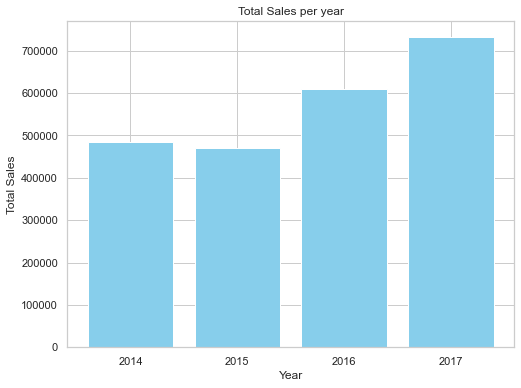

In [265]:
plt.figure(figsize=(8, 6))
plt.bar(
    df['Year'], 
    df['Sales'], 
    color="skyblue"
)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales per year")
plt.xticks(df['Year'])
plt.show()

##### YOY Sales growth
==================================================================================================================

In [267]:
df['YOY Sales Growth %'] = "" * len(df)

In [268]:
for i in range(1, len(df)):
    df['YOY Sales Growth %'][i] = (df['Sales'][i] - df['Sales'][i-1])/df['Sales'][i-1] * 100

C:\Users\Deepanshu\AppData\Local\Temp\ipykernel_31488\675309080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YOY Sales Growth %'][i] = (df['Sales'][i] - df['Sales'][i-1])/df['Sales'][i-1] * 100


In [269]:
df

,Year,Sales,YOY Sales Growth %
0,2014,483966.14,
1,2015,470532.39,-2.775762
2,2016,609205.74,29.471584
3,2017,733215.10,20.355908


##### Time required for each shipping mode
==================================================================================================================

In [282]:
df = pd.merge(
    TransactionTable, 
    OrderLookup, 
    on='Order ID', 
    how="left"
)

In [284]:
# extract year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [288]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

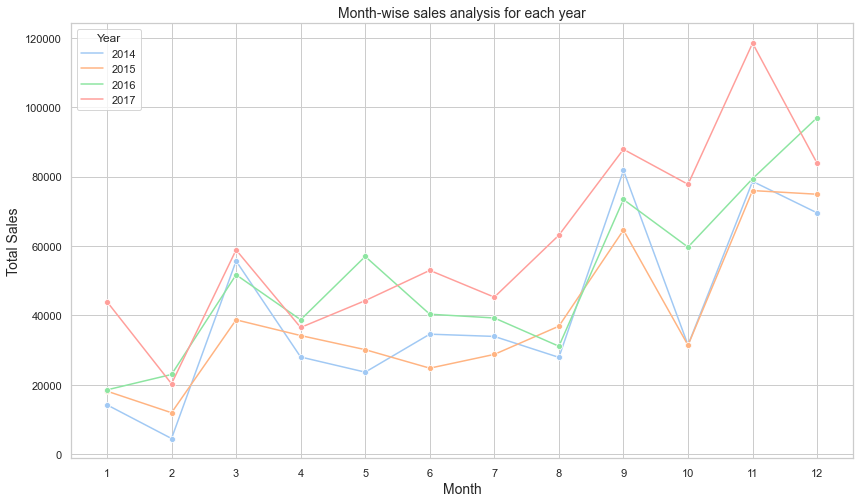

In [300]:
sns.set_style("whitegrid")

# plot
plt.figure(figsize=(14, 8))

sns.lineplot(
    data = monthly_sales, 
    x = "Month", 
    y = "Sales", 
    hue = "Year", 
    marker = "o", 
    palette = "pastel"
)

plt.title(
    "Month-wise sales analysis for each year", 
    fontsize = 14
)

plt.xlabel(
    "Month", 
    fontsize = 14
)

plt.ylabel(
    "Total Sales", 
    fontsize = 14
)

plt.xticks(
    ticks = range(1, 13)
)

plt.legend(
    title = "Year"
)

plt.show()

##### Time required for each shipping mode
==================================================================================================================

In [270]:
OrderLookup

,Order ID,Order Date,Ship Date,Ship Mode
0,CA-2014-100006,2014-09-07,2014-09-13,Standard Class
1,CA-2014-100090,2014-07-08,2014-07-12,Standard Class
2,CA-2014-100293,2014-03-14,2014-03-18,Standard Class
3,CA-2014-100328,2014-01-28,2014-02-03,Standard Class
4,CA-2014-100363,2014-04-08,2014-04-15,Standard Class
...,...,...,...,...
5004,US-2017-168802,2017-11-03,2017-11-07,Standard Class
5005,US-2017-169320,2017-07-23,2017-07-25,Second Class
5006,US-2017-169488,2017-09-07,2017-09-09,First Class
5007,US-2017-169502,2017-08-28,2017-09-01,Standard Class


In [271]:
df = OrderLookup[['Ship Mode', 'Order Date', 'Ship Date']]

In [272]:
df['Shipping Period'] = df['Ship Date'] - df['Order Date']

In [273]:
df

,Ship Mode,Order Date,Ship Date,Shipping Period
0,Standard Class,2014-09-07,2014-09-13,6 days
1,Standard Class,2014-07-08,2014-07-12,4 days
2,Standard Class,2014-03-14,2014-03-18,4 days
3,Standard Class,2014-01-28,2014-02-03,6 days
4,Standard Class,2014-04-08,2014-04-15,7 days
...,...,...,...,...
5004,Standard Class,2017-11-03,2017-11-07,4 days
5005,Second Class,2017-07-23,2017-07-25,2 days
5006,First Class,2017-09-07,2017-09-09,2 days
5007,Standard Class,2017-08-28,2017-09-01,4 days


In [274]:
df = df.groupby(['Ship Mode'])['Shipping Period'].agg(
    MinShippingPeriod = "min", 
    MaxShippingPeriod = "max", 
    AvgShippingPeriod = "mean"
).reset_index()

In [275]:
df['MinShippingPeriod'] = df['MinShippingPeriod'].dt.days
df['MaxShippingPeriod'] = df['MaxShippingPeriod'].dt.days
df['AvgShippingPeriod'] = df['AvgShippingPeriod'].dt.days

In [276]:
df.rename(
    columns = {
        'MinShippingPeriod' : 'Min Shipping Period',
        'MaxShippingPeriod' : 'Max Shipping Period'
    }, 
    inplace = True
)

In [277]:
# define a custom order
custom_order = ['Same Day', 'First Class', 'Second Class', 'Standard Class']

# convert Ship Mode into categorical type with your custom order
df['Ship Mode'] = pd.Categorical(
    df['Ship Mode'], 
    categories = custom_order, 
    ordered = True
)

# now sort based on the categorical order
df = df.sort_values('Ship Mode').reset_index(drop=True)

In [279]:
df

,Ship Mode,Min Shipping Period,Max Shipping Period,AvgShippingPeriod
0,Same Day,0,1,0
1,First Class,1,4,2
2,Second Class,1,5,3
3,Standard Class,3,7,5


=====================================================
=====================================================

# Product Insights

=====================================================
=====================================================

##### Top 10 products by Total Sales
==================================================================================================================

In [301]:
df = TransactionTable

In [303]:
df = pd.merge(
    TransactionTable, 
    ProductLookup, 
    on = 'Product ID', 
    how = 'left'
)

In [311]:
df = df.groupby(['Product ID', 'Product Name'])['Sales'].sum().reset_index().sort_values(
    by='Sales', 
    ascending=False
).head(10)

In [314]:
df

,Product ID,Product Name,Sales
1640,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,61599.83
787,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
1669,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,22638.48
82,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,21870.57
701,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,19823.47
667,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
1630,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,18839.68
1657,TEC-MA-10001127,HP Designjet T520 Inkjet Large Format Printer ...,18374.89
858,OFF-BI-10004995,GBC DocuBind P400 Electric Binding System,17965.07
1443,OFF-SU-10000151,High Speed Automatic Electric Letter Opener,17030.31


=====================================================
=====================================================

# Customer Insight

=====================================================
=====================================================

##### Top customers by Total Sales
==================================================================================================================

In [333]:
df = pd.merge(
    TransactionTable, 
    CustomerLookup, 
    on = 'Customer ID', 
    how = 'left'
)
df

,Order ID,Customer ID,Location Id,Segment,Product ID,Sales,Quantity,Discount,Profit,Profit Or Loss,Customer Name
0,CA-2016-152156,CG-12520,USA385,Consumer,FUR-BO-10001798,261.96,2,0.00,41.91,Profit,Claire Gute
1,CA-2016-152156,CG-12520,USA385,Consumer,FUR-CH-10000454,731.94,3,0.00,219.58,Profit,Claire Gute
2,CA-2016-138688,DV-13045,USA501,Corporate,OFF-LA-10000240,14.62,2,0.00,6.87,Profit,Darrin Van Huff
3,US-2015-108966,SO-20335,USA341,Consumer,FUR-TA-10000577,957.58,5,0.45,-383.03,Loss,Sean O'Donnell
4,US-2015-108966,SO-20335,USA341,Consumer,OFF-ST-10000760,22.37,2,0.20,2.52,Profit,Sean O'Donnell
...,...,...,...,...,...,...,...,...,...,...,...
9988,CA-2014-110422,TB-21400,USA353,Consumer,FUR-FU-10001889,25.25,3,0.20,4.10,Profit,Tom Boeckenhauer
9989,CA-2017-121258,DB-13060,USA477,Consumer,FUR-FU-10000747,91.96,2,0.00,15.63,Profit,Dave Brooks
9990,CA-2017-121258,DB-13060,USA477,Consumer,TEC-PH-10003645,258.58,2,0.20,19.39,Profit,Dave Brooks
9991,CA-2017-121258,DB-13060,USA477,Consumer,OFF-PA-10004041,29.60,4,0.00,13.32,Profit,Dave Brooks


In [334]:
df = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(5)

In [335]:
df.style.hide()

Customer ID,Customer Name,Sales
SM-20320,Sean Miller,25043.070000
TC-20980,Tamara Chand,19052.220000
RB-19360,Raymond Buch,15117.350000
TA-21385,Tom Ashbrook,14595.620000
AB-10105,Adrian Barton,14473.560000


##### Top customer by Total Sales from each region
==================================================================================================================

In [342]:
df = pd.merge(
    TransactionTable, 
    LocationLookup, 
    on = 'Location Id', 
    how = 'left'
)

df = df.merge( 
    CustomerLookup, 
    on = 'Customer ID', 
    how = 'left'
)

In [348]:
df = df.groupby(['Region', 'Customer ID', 'Customer Name'])['Sales'].sum().reset_index()

df = df.sort_values(['Region', 'Sales'], ascending=[True, False])

df = df.groupby(['Region']).first().reset_index()

df

,Region,Customer ID,Customer Name,Sales
0,Central,TC-20980,Tamara Chand,18437.14
1,East,TA-21385,Tom Ashbrook,13723.50
2,South,SM-20320,Sean Miller,23669.21
3,West,RB-19360,Raymond Buch,14345.28


##### Customers who buy the same products
==================================================================================================================

In [437]:
ProductLookup

,Product ID,Product Name,Category,Sub-Category
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Furniture,Bookcases
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Furniture,Bookcases
...,...,...,...,...
1889,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones
1890,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones
1891,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",Technology,Phones
1892,TEC-PH-10004959,Classic Ivory Antique Telephone ZL1810,Technology,Phones


In [458]:
df = pd.merge(
    TransactionTable, 
    CustomerLookup, 
    on = 'Customer ID', 
    how = 'left'
)

df = pd.merge(
    df, 
    ProductLookup, 
    on = 'Product ID', 
    how = 'left'
)

In [459]:
df

,Order ID,Customer ID,Location Id,Segment,Product ID,Sales,Quantity,Discount,Profit,Profit Or Loss,Customer Name,Product Name,Category,Sub-Category
0,CA-2016-152156,CG-12520,USA385,Consumer,FUR-BO-10001798,261.96,2,0.00,41.91,Profit,Claire Gute,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,CA-2016-152156,CG-12520,USA385,Consumer,FUR-CH-10000454,731.94,3,0.00,219.58,Profit,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,CA-2016-138688,DV-13045,USA501,Corporate,OFF-LA-10000240,14.62,2,0.00,6.87,Profit,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,US-2015-108966,SO-20335,USA341,Consumer,FUR-TA-10000577,957.58,5,0.45,-383.03,Loss,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,US-2015-108966,SO-20335,USA341,Consumer,OFF-ST-10000760,22.37,2,0.20,2.52,Profit,Sean O'Donnell,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10325,CA-2014-110422,TB-21400,USA353,Consumer,FUR-FU-10001889,25.25,3,0.20,4.10,Profit,Tom Boeckenhauer,Ultra Door Pull Handle,Furniture,Furnishings
10326,CA-2017-121258,DB-13060,USA477,Consumer,FUR-FU-10000747,91.96,2,0.00,15.63,Profit,Dave Brooks,Tenex B1-RE Series Chair Mats for Low Pile Car...,Furniture,Furnishings
10327,CA-2017-121258,DB-13060,USA477,Consumer,TEC-PH-10003645,258.58,2,0.20,19.39,Profit,Dave Brooks,Aastra 57i VoIP phone,Technology,Phones
10328,CA-2017-121258,DB-13060,USA477,Consumer,OFF-PA-10004041,29.60,4,0.00,13.32,Profit,Dave Brooks,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Office Supplies,Paper


In [460]:
df = df.groupby(['Customer ID', 'Customer Name', 'Category'])['Order ID'].count().reset_index()

In [461]:
df.sort_values(by='Order ID', ascending=False)

,Customer ID,Customer Name,Category,Order ID
711,EH-13765,Edward Hooks,Office Supplies,26
962,JD-15895,Jonathan Doherty,Office Supplies,23
2165,WB-21850,William Brown,Office Supplies,23
2168,XP-21865,Xylona Preis,Office Supplies,22
401,CK-12205,Chloris Kastensmidt,Office Supplies,22
...,...,...,...,...
658,DV-13045,Darrin Van Huff,Technology,1
663,DW-13195,David Wiener,Technology,1
667,DW-13540,Don Weiss,Furniture,1
1679,PT-19090,Pete Takahito,Furniture,1


##### Contribution from each region
==================================================================================================================

In [432]:
df = pd.merge(
    TransactionTable, 
    LocationLookup, 
    on = 'Location Id', 
    how = 'left'
)

In [433]:
df = df.groupby(['Region'])['Order ID'].nunique().reset_index()

In [435]:
total_orders = df['Order ID'].sum()

df['Contribution %'] = (df['Order ID']/total_orders)*100

df['Contribution %'] = df['Contribution %'].round(2)

In [436]:
df

,Region,Order ID,Contribution %
0,Central,1175,23.46
1,East,1401,27.97
2,South,822,16.41
3,West,1611,32.16
